# How to include biological information into hyperdimensional vectors and is this useful?

In [20]:
include("../src/HDC.jl")
include("../src/math.jl")
include("../src/experimental.jl")
using DataFrames
using CSV

## Method 1: Via embeddings (ESM-2)

In [45]:
#Load embeddings from last hidden layer of ESM-2 model (21x1280)
aa_embeddings = DataFrame(CSV.File("../data/amino_acid_embeddings.csv"))
amino_acids_esm = aa_embeddings.protein_ID
aa_emb = Matrix(aa_embeddings[:, 2:end])
# Create HDVs
HDV_mat_bit = nested_arrays2mat([bithdv() for i in 1:size(aa_emb)[2]], true)
HDV_mat_bip = nested_arrays2mat([hdv() for i in 1:size(aa_emb)[2]], true)

# Extend embeddings into hyperdimensional space
AA_bip_esm = permutedims(aa_emb * HDV_mat_bip .|> sign)
AA_bit_esm = permutedims(mat_scaler(aa_emb * HDV_mat_bit, 0, 1, 2) .|> round)

10000×21 Matrix{Float64}:
 1.0  1.0  0.0  1.0  1.0  1.0  1.0  0.0  …  0.0  1.0  1.0  1.0  0.0  0.0  0.0
 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  0.0  0.0  1.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  1.0  1.0  0.0  0.0  0.0
 1.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0     1.0  1.0  1.0  1.0  1.0  0.0  0.0
 0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0     0.0  1.0  1.0  1.0  0.0  1.0  1.0
 0.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  …  0.0  0.0  1.0  0.0  1.0  1.0  1.0
 1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0     1.0  0.0  0.0  1.0  0.0  1.0  0.0
 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  0.0  1.0  0.0  1.0  1.0  1.0
 0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  1.0  0.0  1.0  1.0  1.0  1.0
 ⋮                        ⋮              ⋱       ⋮                        ⋮
 1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0  0.0  0.0  1.0
 1.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0 

## Method 2: A bit more true to HDC framework but naive without proper training

In [22]:
## Initiate random HDVs for every AA
AA_list = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
groups = Dict("polar" => ['S', 'T', 'Y', 'N', 'Q'], "non-polar" => ['G', 'A', 'V', 'C', 'P', 'L', 'I', 'M', 'W', 'F'], 
         "pos+" => ['L', 'R', 'H'], "neg-" => ['D', 'E'])

aa_bithdv = [bithdv() for i in 1:length(AA_list)]
aa_biphdv = [hdv() for i in 1:length(AA_list)]

aa_bithdv = Dict(zip(AA_list, aa_bithdv))
aa_biphdv = Dict(zip(AA_list, aa_biphdv))

# Make an HDV for every class
polar_hdv_bip = add([aa_biphdv[i] for i in groups["polar"]]...)
polar_hdv_bit = bitadd([aa_bithdv[i] for i in groups["polar"]]...)

nonpolar_hdv_bip = add([aa_biphdv[i] for i in groups["non-polar"]]...)
nonpolar_hdv_bit = bitadd([aa_bithdv[i] for i in groups["non-polar"]]...)

pos_hdv_bip = add([aa_biphdv[i] for i in groups["pos+"]]...)
pos_hdv_bit = bitadd([aa_bithdv[i] for i in groups["pos+"]]...)

neg_hdv_bip = add([aa_biphdv[i] for i in groups["neg-"]]...)
neg_hdv_bit = bitadd([aa_bithdv[i] for i in groups["neg-"]]...)

group_hdv_bip = Dict("polar"=>polar_hdv_bip, "non-polar" => nonpolar_hdv_bip, "pos+" => pos_hdv_bip, "neg-" => neg_hdv_bip)
group_hdv_bit = Dict("polar"=>polar_hdv_bit, "non-polar" => nonpolar_hdv_bit, "pos+" => pos_hdv_bit, "neg-" => neg_hdv_bit)

# Add random AA HDV to its class HDV to introduce similarity
for i in keys(groups)
    for j in groups[i]
        aa_biphdv[j] = add(aa_biphdv[j], group_hdv_bip[i])
    end
end

for i in keys(groups)
    for j in groups[i]
        aa_bithdv[j] = bitadd(aa_bithdv[j], group_hdv_bit[i])
    end
end

naive_bit = nested_arrays2mat([aa_bithdv[i] for i in AA_list])
naive_bip = nested_arrays2mat([aa_biphdv[i] for i in AA_list])

10000×20 Matrix{Float64}:
 -1.0  -1.0  -1.0   1.0   0.0  -1.0  …  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0
  1.0   1.0   1.0  -1.0   1.0   1.0      1.0   0.0  -1.0   1.0   1.0  -1.0
 -1.0   1.0   1.0  -1.0  -1.0  -1.0      0.0   0.0   1.0   1.0  -1.0   1.0
  1.0   1.0  -1.0  -1.0   1.0   1.0     -1.0   0.0   1.0  -1.0  -1.0   1.0
 -1.0  -1.0   1.0   1.0  -1.0  -1.0      1.0   1.0   1.0  -1.0   0.0   1.0
  1.0   0.0  -1.0  -1.0   1.0   1.0  …   1.0   1.0   1.0   0.0   0.0   1.0
  1.0   0.0  -1.0  -1.0   1.0   1.0      0.0  -1.0  -1.0   1.0   0.0  -1.0
 -1.0   1.0   1.0   1.0   1.0  -1.0      1.0  -1.0  -1.0  -1.0   1.0  -1.0
 -1.0   1.0   1.0   1.0  -1.0   1.0     -1.0   0.0  -1.0  -1.0   1.0  -1.0
  0.0   0.0  -1.0   1.0  -1.0   0.0     -1.0   1.0   0.0   0.0  -1.0   1.0
  ⋮                             ⋮    ⋱         ⋮                      
  1.0   1.0  -1.0   1.0  -1.0   1.0      1.0  -1.0  -1.0   1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0  -1.0   0.0     -1.0  -1.0   0.0  -1.0  -1.0  -1.0
 -1

## Method 3: Could we train a NN oursselves and extract embeddings from this?

## Method 4: Could we iteratively train AA embeddings via 'partial bundling'?

## Baseline random HDVs

In [23]:
rand_bit = nested_arrays2mat([bithdv() for i in 1:20])
rand_bip = nested_arrays2mat([hdv() for i in 1:20])

10000×20 Matrix{Float64}:
 -1.0   1.0   1.0   1.0  -1.0  -1.0  …   1.0   1.0   1.0   1.0  -1.0  -1.0
 -1.0  -1.0   1.0  -1.0  -1.0  -1.0      1.0  -1.0   1.0   1.0   1.0   1.0
 -1.0   1.0  -1.0   1.0  -1.0   1.0      1.0   1.0  -1.0  -1.0  -1.0  -1.0
 -1.0  -1.0   1.0  -1.0   1.0   1.0     -1.0  -1.0   1.0  -1.0  -1.0   1.0
  1.0   1.0   1.0   1.0  -1.0   1.0      1.0   1.0   1.0   1.0   1.0  -1.0
  1.0   1.0   1.0  -1.0   1.0  -1.0  …  -1.0   1.0  -1.0   1.0  -1.0   1.0
 -1.0   1.0   1.0  -1.0   1.0  -1.0      1.0  -1.0   1.0  -1.0  -1.0   1.0
  1.0  -1.0   1.0   1.0   1.0  -1.0     -1.0   1.0   1.0  -1.0   1.0   1.0
 -1.0  -1.0   1.0  -1.0   1.0  -1.0     -1.0   1.0   1.0  -1.0   1.0  -1.0
  1.0  -1.0   1.0  -1.0   1.0  -1.0      1.0  -1.0  -1.0  -1.0  -1.0   1.0
  ⋮                             ⋮    ⋱         ⋮                      
 -1.0  -1.0  -1.0  -1.0   1.0   1.0      1.0  -1.0   1.0  -1.0   1.0   1.0
 -1.0  -1.0   1.0   1.0   1.0  -1.0      1.0  -1.0  -1.0   1.0  -1.0  -1.0
 -1

## PCA plots: is the physicochemical and biological information encoded into the HDVs?
### Binary HDVs

In [46]:
using MultivariateStats

PCA_rand_bit = fit(PCA, rand_bit; maxoutdim=2)
proj_rand_bit = projection(PCA_rand_bit)

PCA_ESM_bit = fit(PCA, AA_bit_esm; maxoutdim=2)
proj_ESM_bit = projection(PCA_ESM_bit)

PCA_naive_bit = fit(PCA, naive_bit; maxoutdim=2)
proj_naive_bit = projection(PCA_naive_bit)

10000×2 Matrix{Float64}:
 -0.0175286    -0.00779329
 -0.00163329   -0.0174785
  0.00204393    0.00376623
  0.00336091   -0.00725601
 -0.00811471   -0.00430335
  0.000166009  -0.0256381
  0.000494552   0.0130667
  0.0127727     0.00792722
 -0.00467693   -0.00339521
 -0.0114944    -0.0148174
  ⋮            
 -0.00275566    0.00223231
  0.0129439     0.0105635
  0.015938      0.00529136
  0.00260368   -0.00486454
 -0.0032035    -0.00774957
 -0.00231655   -0.0148583
 -0.0107708     0.00615744
  0.0048637     0.000846336
 -0.00670727   -0.00471023

In [26]:
PCA_rand_bit

PCA(indim = 10000, outdim = 2, principalratio = 0.11303796566577777)

Pattern matrix (unstandardized loadings):
─────────────────────────────────
                PC1           PC2
─────────────────────────────────
1      -0.0161836    -0.0871097
2      -0.0611736     0.0531298
3       0.205252      0.131566
4       0.117052      0.0967702
5       0.00904107    0.0507043
6       0.186864      0.0363607
7      -0.00547103   -0.0260327
8       0.162918      0.151932
9       0.0535323    -0.126946
10     -0.100504      0.00833835
11      0.0869258     0.0538816
12     -0.203853     -0.218564
13      0.0438058    -0.137248
14     -0.072144     -0.00913415
15      0.0717133     0.0183941
16     -0.102569      0.0283113
17      0.115919     -0.0757209
18      0.0950233     0.173898
19      0.133603      0.0621585
20      0.0779161     0.0581927
21     -0.150477      0.0814884
22      0.00807992    0.0272362
23     -0.0947204     0.345617
24     -0.0752204     0.0368222
25     -0.131745     -0

In [47]:
PCA_ESM_bit

PCA(indim = 10000, outdim = 2, principalratio = 0.2192631321533451)

Pattern matrix (unstandardized loadings):
─────────────────────────────────
                PC1           PC2
─────────────────────────────────
1       0.169692      0.1033
2      -0.0918792     0.0216101
3      -0.193892      0.0756474
4      -0.183545      0.337591
5       0.100566     -0.162769
6       0.178473     -0.196599
7       0.0803108     0.0306325
8       0.168858     -0.0344504
9       0.215364     -0.219871
10     -0.0236955    -0.265679
11      0.139408     -0.14461
12      0.0611441    -0.0496952
13     -0.0986959    -0.142246
14     -0.0368433     0.160422
15     -0.0107666    -0.000171666
16     -0.253597      0.256222
17      0.171699     -0.170695
18      0.285247      0.097154
19     -0.00266974   -0.0427403
20     -0.0689616    -0.149723
21     -0.0633617     0.151378
22     -0.154805     -0.306758
23     -0.122997     -0.189391
24     -0.167335     -0.0429806
25      0.070601     -0.127728
26   

In [28]:
PCA_naive_bit

PCA(indim = 10000, outdim = 2, principalratio = 0.3144578156210488)

Pattern matrix (unstandardized loadings):
─────────────────────────────────
                PC1           PC2
─────────────────────────────────
1      -0.36185      -0.127343
2      -0.0337168    -0.285599
3       0.0421937     0.0615404
4       0.0693807    -0.118563
5      -0.167516     -0.0703168
6       0.00342699   -0.418928
7       0.0102093     0.213511
8       0.263672      0.129531
9      -0.0965479    -0.0554778
10     -0.237285     -0.242117
11     -0.214223      0.212394
12     -0.243138      0.0274728
13     -0.274526     -0.0378235
14      0.245325      0.106828
15      0.276665      0.0563349
16     -0.00403996    0.0239892
17      0.0973015    -0.0152363
18      0.260157     -0.182271
19      0.397018      0.0220059
20     -0.0477061    -0.169064
21      0.332169     -0.113085
22      0.0701517    -0.366484
23      0.0693074    -0.364309
24     -0.129553      0.0383325
25      0.0280271     0.0296347
2

#### Random binary HDVs

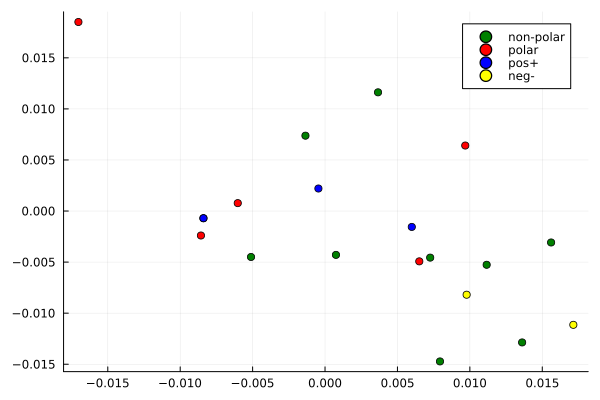

In [41]:
using Plots

key = collect(keys(groups))
indices = [[i for i in 1:length(AA_list) if AA_list[i] in groups[j]] for j in key]

colors = [:green, :red, :blue, :yellow]
fig = Plots.plot()

for i in 1:4
    scatter!(fig, (proj_rand_bit[indices[i], 1], proj_rand_bit[indices[i], 2]), label=key[i], mc = colors[i])
end

fig

#### ESM embedded HDVs

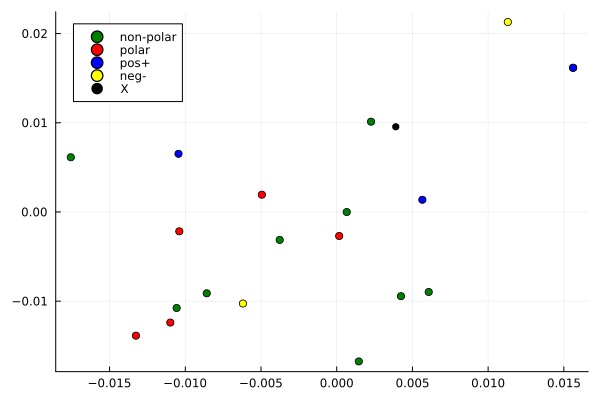

In [55]:
indices = [[i for i in 1:length(amino_acids_esm) if only(amino_acids_esm[i]) in groups[j]] for j in key]

colors = [:green, :red, :blue, :yellow]
fig = Plots.plot()

for i in 1:4
    scatter!(fig, (proj_ESM_bit[indices[i], 1], proj_ESM_bit[indices[i], 2]), label=key[i], mc = colors[i])
end
scatter!(fig, (proj_ESM_bit[21, 1], proj_ESM_bit[21, 2]), label="X", mc = :black)

fig

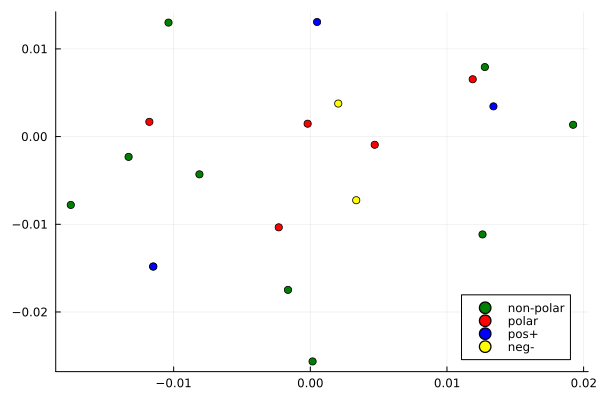

In [56]:
indices = [[i for i in 1:length(AA_list) if AA_list[i] in groups[j]] for j in key]

colors = [:green, :red, :blue, :yellow]
fig = Plots.plot()

for i in 1:4
    scatter!(fig, (proj_naive_bit[indices[i], 1], proj_naive_bit[indices[i], 2]), label=key[i], mc = colors[i])
end

fig